# FEATURE SELECTGION FOR A

In [1]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# data directory
DATA_DIR = '.'
data_paths = {'A': {'train': os.path.join(DATA_DIR, 'A', 'A_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'A', 'A_hhold_test.csv'), 
                    'ind_train':os.path.join(DATA_DIR, 'A', 'A_indiv_train.csv'),
                    'ind_test':os.path.join(DATA_DIR, 'A', 'A_indiv_test.csv')}}

             
                                          
                                          
                
# load training data
a_train = pd.read_csv(data_paths['A']['train'], index_col='id')
a_train_ind=pd.read_csv(data_paths['A']['ind_train'], index_col='id')
a_test = pd.read_csv(data_paths['A']['test'], index_col='id')
a_test_ind = pd.read_csv(data_paths['A']['ind_test'], index_col='id')

a_train.reset_index(level=0, inplace=True)
a_train_ind.reset_index(level=0, inplace=True)
a_test.reset_index(level=0, inplace=True)
a_test_ind.reset_index(level=0, inplace=True)

print(a_train.shape)
a_train.head()

(8203, 346)


id wBXbHZmp SlDKnCuu KAJOWiiw DsKacCdL rtPrBBPl tMJrvvut jdetlNNF  \
0  46107    JhtDR    GUusz    TuovO    ZYabk    feupP    PHMVg    NDTCU   
1  82739    JhtDR    GUusz    TuovO    ZYabk    feupP    PHMVg    NDTCU   
2   9646    JhtDR    GUusz    BIZns    ZYabk    uxuSS    PHMVg    NDTCU   
3  10975    JhtDR    GUusz    TuovO    ZYabk    feupP    PHMVg    NDTCU   
4  16463    JhtDR    alLXR    TuovO    ZYabk    feupP    PHMVg    NDTCU   

  maLAYXwi vwpsXRGk   ...   sDGibZrP CsGvKKBJ OLpGAaEu LrDrWRjC JCDeZBXq  \
0    cLAGr    XAmOF   ...      JqHnW    MaXfS    etZsD    idRwx    LPtkN   
1    sehIp    lwCkE   ...      JqHnW    MaXfS    HxnJy    idRwx    UyAms   
2    sehIp    qNABl   ...      JqHnW    MaXfS    USRak    idRwx    UyAms   
3    sehIp    sPNOc   ...      JqHnW    MaXfS    USRak    idRwx    UyAms   
4    cLAGr    NdlDR   ...      JqHnW    MaXfS    etZsD    idRwx    UyAms   

  HGPWuGlV GDUPaBQs WuwrCsIY AlDbXTlZ country  
0    vkbkA    qQxrL    AITFl    aQeIm       A  
1    vkbkA    qQxrL    AITFl    cecIq       A  
2    vkbkA    qQxrL    AITFl    cecIq       A  
3    vkbkA    qQxrL    AITFl    cecIq       A  
4    vkbkA    qQxrL    GAZGl    aQeIm       A  

[5 rows x 346 columns]

In [2]:
a_train.poor=a_train.poor.astype('int')
a_train_ind.poor=a_train_ind.poor.astype('int')
numeric=[]
categorical=[]
for val in a_train.columns:
    if ((a_train[val].dtype=='int64')|(a_train[val].dtype=='float64')):
        numeric.append(val)
        
    elif a_train[val].dtype=='object':
        categorical.append(val)
        
aggregate_df=a_train_ind.groupby('id',as_index=False).poor.count()
aggregate_df.columns=['id','count_qns']
a_train=a_train.merge(aggregate_df,left_on='id',right_on='id')
a_train.head()


id wBXbHZmp SlDKnCuu KAJOWiiw DsKacCdL rtPrBBPl tMJrvvut jdetlNNF  \
0  46107    JhtDR    GUusz    TuovO    ZYabk    feupP    PHMVg    NDTCU   
1  82739    JhtDR    GUusz    TuovO    ZYabk    feupP    PHMVg    NDTCU   
2   9646    JhtDR    GUusz    BIZns    ZYabk    uxuSS    PHMVg    NDTCU   
3  10975    JhtDR    GUusz    TuovO    ZYabk    feupP    PHMVg    NDTCU   
4  16463    JhtDR    alLXR    TuovO    ZYabk    feupP    PHMVg    NDTCU   

  maLAYXwi vwpsXRGk    ...    CsGvKKBJ OLpGAaEu LrDrWRjC JCDeZBXq HGPWuGlV  \
0    cLAGr    XAmOF    ...       MaXfS    etZsD    idRwx    LPtkN    vkbkA   
1    sehIp    lwCkE    ...       MaXfS    HxnJy    idRwx    UyAms    vkbkA   
2    sehIp    qNABl    ...       MaXfS    USRak    idRwx    UyAms    vkbkA   
3    sehIp    sPNOc    ...       MaXfS    USRak    idRwx    UyAms    vkbkA   
4    cLAGr    NdlDR    ...       MaXfS    etZsD    idRwx    UyAms    vkbkA   

  GDUPaBQs WuwrCsIY AlDbXTlZ country count_qns  
0    qQxrL    AITFl    aQeIm       A         6  
1    qQxrL    AITFl    cecIq       A         3  
2    qQxrL    AITFl    cecIq       A         6  
3    qQxrL    AITFl    cecIq       A         3  
4    qQxrL    GAZGl    aQeIm       A         5  

[5 rows x 347 columns]

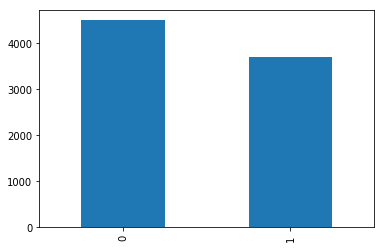

In [3]:
a_train.poor.value_counts().plot(kind='bar')
#Reasonably balanced

In [4]:
from util import *
print("Country A")
cols=[i for i in a_train.columns if i not in ['id','poor']]
aX_train = pre_process_data(a_train.loc[:,cols])
print(aX_train.shape)


ay_train = np.ravel(a_train.poor)
print("----test-----")
# process the test data
aY_test = pre_process_data(a_test.loc[:,cols], enforce_cols=aX_train.columns)
print(aY_test.shape)

Country A
Input shape:	(8203, 345)
After standardization (8203, 345)
After converting categoricals:	(8203, 860)
(8203, 860)
----test-----
Input shape:	(4041, 345)
After standardization (4041, 345)
After converting categoricals:	(4041, 852)
(4041, 860)


In [5]:
#Feature selection

aX_train['poor']=a_train.poor
aX_train.drop('country_A',axis=1,inplace=True)
aY_test.drop('country_A',axis=1,inplace=True)

from sklearn.feature_selection import VarianceThreshold

print("Remove 0 variance")
a_train_df=remove_feat_constants(aX_train)

X = a_train_df.loc[:,[i for i in a_train_df.columns if i!='poor']]
y = a_train.poor



Remove 0 variance
Delete  Index([], dtype='object')
  - Deleted 0 / 860 features (~= 0.0 %)


In [6]:
X.shape,y.shape

((8203, 859), (8203,))

# #1. Tree Based Ranking

We can fit a classfier to each feature and rank the predictive power. This method selects the most powerful features individually but ignores the predictive power when features are combined.

Random Forest Classifier is used in this case because it is robust, nonlinear, and doesn't require scaling.


In [7]:
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
print(X.shape,y.shape)
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X,y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_test_new=model.transform(aY_test)
print(X_new.shape,X_test_new.shape)


print('Tree based feature selection')



(8203, 859) (8203,)
(8203, 268) (4041, 268)
Tree based feature selection


In [8]:
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sys
sys.path.append('/Users/priya/xgboost/python-package') 
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

  
#All features
def runAgainstClassifiers(X,y):
    Classifiers = [
                RandomForestClassifier(n_estimators=200),
                LogisticRegression(penalty='l1',C=1),
                LogisticRegression(penalty='l2',C=1),
                LogisticRegression(),
                GradientBoostingClassifier(n_estimators=200),
                xgb.XGBClassifier()]


    skf = StratifiedKFold( n_splits=2,shuffle=True, random_state=42)
    log_loss_map={}

    for clf in Classifiers:

        log_loss_clf=[]
        for train_index, test_index in skf.split(X,y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            clf.fit(X_train,y_train)
            pred1=(clf.predict_proba(X_test)[:,1])
            log_loss_clf.append(log_loss(y_test,pred1))
        print(clf.__class__.__name__,np.mean(log_loss_clf))
        log_loss_map[clf.__class__.__name__]=np.mean(log_loss_clf)
  
print("No feature selection")
runAgainstClassifiers(pd.DataFrame(X),y)



No feature selection
RandomForestClassifier 0.390746607411
LogisticRegression 0.308836509817
LogisticRegression 0.323344634078
LogisticRegression 0.323344634078
GradientBoostingClassifier 0.290067791571
XGBClassifier 0.313089876406


In [9]:
print(X_new.shape)
#Treebased feature selection
print("Tree based feature selection")
runAgainstClassifiers(pd.DataFrame(X_new),y)


(8203, 268)
Tree based feature selection
RandomForestClassifier 0.376835895288
LogisticRegression 0.298003527911
LogisticRegression 0.300357752093
LogisticRegression 0.300357752093
GradientBoostingClassifier 0.290745739969
XGBClassifier 0.310696288946


# TREEBASED + LR

In [10]:
# TREEBASED + GBM

# L1 based feature selection

In [11]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X,y)
model_2 = SelectFromModel(lsvc, prefit=True)
X_lasoo = model_2.transform(X)
X_test_lasoo=model_2.transform(aY_test)

print(X_lasoo.shape,X.shape,X_test_lasoo.shape,aY_test.shape)
print("L1 based feature selection")
runAgainstClassifiers(pd.DataFrame(X_lasoo),y)


(8203, 118) (8203, 859) (4041, 118) (4041, 859)
L1 based feature selection
RandomForestClassifier 0.347939745735
LogisticRegression 0.291883685216
LogisticRegression 0.292127121444
LogisticRegression 0.292127121444
GradientBoostingClassifier 0.289146353227
XGBClassifier 0.309774467698


# L2 Regularisation

In [12]:




from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l2", dual=False).fit(X,y)
model_3 = SelectFromModel(lsvc, prefit=True)
X_ridge = model_3.transform(X)
X_test_ridge=model_3.transform(aY_test)

print(X_ridge.shape,X.shape,X_test_ridge.shape,aY_test.shape)
print("L2 based feature selection")
runAgainstClassifiers(pd.DataFrame(X_ridge),y)


(8203, 316) (8203, 859) (4041, 316) (4041, 859)
L2 based feature selection
RandomForestClassifier 0.354498480198
LogisticRegression 0.289755355432
LogisticRegression 0.287881120553
LogisticRegression 0.287881120553
GradientBoostingClassifier 0.288398403787
XGBClassifier 0.3108839804


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_ridge, y, test_size = 0.25, random_state = 0)

In [98]:
import lightgbm as lgb

d_train = lgb.Dataset(x_train, label=y_train)

params = {}
params['learning_rate'] = 0.025
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.8
params['num_leaves'] = 20
params['min_data'] = 40
params['max_depth'] = 10

clf = lgb.train(params, d_train, 300)
#Prediction
y_pred=clf.predict(x_test)
print(log_loss(y_train,clf.predict(x_train)))
print(log_loss(y_test,y_pred))
#Confusion matrix


0.203064760766
0.292841973542


In [73]:
d_train = lgb.Dataset(X_ridge, label=y)

clf=lgb.train(params,d_train)
y_pred=clf.predict(X_test_ridge)
y_pred

array([ 0.14953314,  0.19386679,  0.22851103, ...,  0.27918157,
        0.15080779,  0.1631376 ])

In [ ]:
def createDF(iid,preds,filename):
    df=pd.DataFrame()
    df['id']=iid
    df['country']='A'
    df['poor']=preds[:,1]
    df.to_csv(filename,index=False,columns=['id','country','poor'])
    
createDF(a_test['id'],y_pred,'A-ridge.csv')


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold

params = {
    'n_estimators' : [100,200,300],
    'learning_rate' : [.1,.2,.3],
    'max_depth' : [3,5,7]
}
gb=GradientBoostingClassifier()
clf = GridSearchCV(gb ,params, cv=3, scoring='neg_log_loss',verbose=2)
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)


log_loss_clf=[]
for train_index, test_index in skf.split(X_ridge,y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]
            clf.fit(X_train,y_train)
            pred1=(clf.predict_proba(X_test)[:,1])
            log_loss_clf.append(log_loss(y_test,pred1))
print(np.mean(log_loss_clf))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=100, total=  10.4s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s


[CV] . learning_rate=0.1, max_depth=3, n_estimators=100, total=  10.9s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=100, total=  10.5s
[CV] learning_rate=0.1, max_depth=3, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=200, total=  19.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=200, total=  19.5s
[CV] learning_rate=0.1, max_depth=3, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=200, total=  19.7s
[CV] learning_rate=0.1, max_depth=3, n_estimators=300 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=300, total=  46.4s
[CV] learning_rate=0.1, max_depth=3, n_estimators=300 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=300, total=  32.6s
[CV] learning_rate=0.1, max_depth=3, n_estimators=300 ................
[CV] .

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 149.0min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=100, total=  10.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s remaining:    0.0s


[CV] . learning_rate=0.1, max_depth=3, n_estimators=100, total=  11.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=100, total=  17.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=200, total=  28.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=200, total=  23.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=200, total=  25.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=300 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=300, total=  39.9s
[CV] learning_rate=0.1, max_depth=3, n_estimators=300 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=300, total=  38.6s
[CV] learning_rate=0.1, max_depth=3, n_estimators=300 ................
[CV] .

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
lsvc = LinearSVC( dual=False).fit(X,y)
#                LogisticRegression(C=0.1,solver='liblinear',max_iter=200),

select = SelectFromModel(lsvc)
clf=LogisticRegression(max_iter=200)

pipe = Pipeline([('select', select), 
 ('clf', clf)])
params={
 'select__threshold': [.01, .05, .1, "mean", "median", "2.*mean"],
 'select__estimator__C':[0.01,0.1,1,10],
 'select__estimator__penalty': ['l1', 'l2'],
 'clf__C' : [0.1,1,10,0.01,100],
 'clf__penalty' : ['l1','l2']
 }


gsv = GridSearchCV(pipe,params, cv=10,verbose=2)
gsv.fit(X,y)
pred_train=gsv.predict_proba(X)
print(log_loss(y,pred_train[:,1]))
# fit our pipeline to our data
pipe.steps[0][1].fit(X, y)

# list the columns that the Logisti Regression selected by calling the get_support() method from SelectFromModel
X.columns[pipe.steps[0][1].get_support()]
lr=LogisticRegression(C=1,solver='liblinear',max_iter=200,penalty='l2')
lr.fit(X_ridge,y)
preds=lr.predict_proba(X_test_ridge)[:,1]
preds

In [79]:
def createDF(iid,preds,filename):
    df=pd.DataFrame()
    df['id']=iid
    df['country']='A'
    df['poor']=preds[:,1]
    df.to_csv(filename,index=False,columns=['id','country','poor'])

lr.fit(X_ridge,y)

pred_ridge=lr.predict_proba(X_test_ridge)
createDF(a_test['id'],pred_ridge,'A-ridge.csv')



In [72]:
clf.best_params_

{'lr__C': 0.2,
 'select__estimator__max_depth': 3,
 'select__threshold': 'median'}

In [56]:
lsvc = LinearSVC( C=0.01,penalty="l1", dual=False).fit(X,y)
model_3 = SelectFromModel(lsvc, prefit=True)
X_lasoo= model_3.transform(X)
X_test_lasoo=model_3.transform(aY_test)

print(X_lasoo.shape,X.shape,X_test_lasoo.shape,aY_test.shape)
print("L1 based feature selection")
lr=LogisticRegression(penalty='l1',C=0.2)
runAgainstClassifiers(pd.DataFrame(X_lasoo),y)


(8203, 126) (8203, 859) (4041, 126) (4041, 859)
L1 based feature selection
RandomForestClassifier 0.353339823577
LogisticRegression 0.290693799768
LogisticRegression 0.291105695933
LogisticRegression 0.291105695933
LogisticRegression 0.289018879248
GradientBoostingClassifier 0.28984028582
XGBClassifier 0.308981918428


In [ ]:
lr.fit(X_lasoo,y)

pred_ridge=lr.predict_proba(X_test_lasoo)
createDF(a_test['id'],pred_ridge,'A.csv')



# Boruta

In [78]:
import sys
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, n_jobs=4, class_weight='balanced',max_depth=6)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
boruta_selector.fit(aX_train.as_matrix(), a_train.poor)

# number of selected features
print ('\n Number of selected features:')
print (boruta_selector.n_features_)

feature_df = pd.DataFrame(aX_train.columns.tolist(), columns=['features'])
feature_df['rank']=boruta_selector.ranking_
feature_df = feature_df.sort_values('rank', ascending=True).reset_index(drop=True)
print ('\n Top %d features:' % boruta_selector.n_features_)
#print (feature_df.head(boruta_selector.n_features_))
boruta_feats=(feature_df.head(boruta_selector.n_features_)).features.tolist()
boruta_feats.remove('poor')
print("Boruta based feature selection")
runAgainstClassifiers(pd.DataFrame(X.loc[:,boruta_feats]),y)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	860
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	860
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	860
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	860
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	860
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	860
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	860
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	144
Tentative: 	113
Rejected: 	603


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	144
Tentative: 	113
Rejected: 	603


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	144
Tentative: 	113
Rejected: 	603


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	144
Tentative: 	113
Rejected: 	603


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	144
Tentative: 	90
Rejected: 	626


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	144
Tentative: 	90
Rejected: 	626


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	144
Tentative: 	90
Rejected: 	626


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	144
Tentative: 	90
Rejected: 	626


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	144
Tentative: 	80
Rejected: 	636


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	144
Tentative: 	80
Rejected: 	636


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	144
Tentative: 	80
Rejected: 	636


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	144
Tentative: 	80
Rejected: 	636


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	144
Tentative: 	73
Rejected: 	643


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	144
Tentative: 	73
Rejected: 	643


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	144
Tentative: 	52
Rejected: 	664


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	144
Tentative: 	52
Rejected: 	664


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	144
Tentative: 	52
Rejected: 	664


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	144
Tentative: 	52
Rejected: 	664


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	144
Tentative: 	40
Rejected: 	676


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	144
Tentative: 	40
Rejected: 	676


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	144
Tentative: 	40
Rejected: 	676


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	144
Tentative: 	29
Rejected: 	687


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	144
Tentative: 	29
Rejected: 	687


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	144
Tentative: 	29
Rejected: 	687


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	144
Tentative: 	22
Rejected: 	694


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	144
Tentative: 	22
Rejected: 	694


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	144
Tentative: 	18
Rejected: 	698


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	144
Tentative: 	18
Rejected: 	698


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	144
Tentative: 	18
Rejected: 	698


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	144
Tentative: 	14
Rejected: 	702


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	144
Tentative: 	14
Rejected: 	702


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	144
Tentative: 	14
Rejected: 	702


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	144
Tentative: 	11
Rejected: 	705


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 100
Confirmed: 	144
Tentative: 	11
Rejected: 	705


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 100
Confirmed: 	144
Tentative: 	11
Rejected: 	705


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 100
Confirmed: 	144
Tentative: 	8
Rejected: 	708


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 100
Confirmed: 	144
Tentative: 	8
Rejected: 	708


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 100
Confirmed: 	144
Tentative: 	8
Rejected: 	708


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 100
Confirmed: 	144
Tentative: 	6
Rejected: 	710


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 100
Confirmed: 	144
Tentative: 	6
Rejected: 	710


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 100
Confirmed: 	144
Tentative: 	6
Rejected: 	710


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 100
Confirmed: 	144
Tentative: 	6
Rejected: 	710


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 100
Confirmed: 	144
Tentative: 	6
Rejected: 	710


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 100
Confirmed: 	144
Tentative: 	6
Rejected: 	710


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 100
Confirmed: 	144
Tentative: 	6
Rejected: 	710


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	144
Tentative: 	6
Rejected: 	710


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	144
Tentative: 	6
Rejected: 	710


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	144
Tentative: 	6
Rejected: 	710


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	144
Tentative: 	6
Rejected: 	710


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	144
Tentative: 	6
Rejected: 	710


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	144
Tentative: 	6
Rejected: 	710


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	144
Tentative: 	6
Rejected: 	710


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	144
Tentative: 	6
Rejected: 	710


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	144
Tentative: 	6
Rejected: 	710


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 100
Confirmed: 	144
Tentative: 	5
Rejected: 	711


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 100
Confirmed: 	144
Tentative: 	5
Rejected: 	711


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 100
Confirmed: 	144
Tentative: 	5
Rejected: 	711


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 100
Confirmed: 	144
Tentative: 	5
Rejected: 	711


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	66 / 100
Confirmed: 	144
Tentative: 	5
Rejected: 	711


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	67 / 100
Confirmed: 	144
Tentative: 	4
Rejected: 	712


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	68 / 100
Confirmed: 	144
Tentative: 	4
Rejected: 	712


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	69 / 100
Confirmed: 	144
Tentative: 	4
Rejected: 	712


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	70 / 100
Confirmed: 	144
Tentative: 	4
Rejected: 	712


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	71 / 100
Confirmed: 	144
Tentative: 	4
Rejected: 	712


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	72 / 100
Confirmed: 	144
Tentative: 	4
Rejected: 	712


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	73 / 100
Confirmed: 	144
Tentative: 	4
Rejected: 	712


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	74 / 100
Confirmed: 	144
Tentative: 	4
Rejected: 	712


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	75 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	76 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	77 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	78 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	79 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	80 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	81 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	82 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	83 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	84 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	85 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	86 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	87 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	88 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	89 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	90 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	91 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	92 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	93 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	94 / 100
Confirmed: 	144
Tentative: 	3
Rejected: 	713


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	95 / 100
Confirmed: 	144
Tentative: 	2
Rejected: 	714


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	96 / 100
Confirmed: 	144
Tentative: 	2
Rejected: 	714


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	97 / 100
Confirmed: 	144
Tentative: 	2
Rejected: 	714


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	98 / 100
Confirmed: 	144
Tentative: 	2
Rejected: 	714


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	99 / 100
Confirmed: 	144
Tentative: 	2
Rejected: 	714


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	144
Tentative: 	1
Rejected: 	714

 Number of selected features:
144

 Top 144 features:
Boruta based feature selection
RandomForestClassifier 0.366043763723
LogisticRegression 0.306449945057
LogisticRegression 0.307636277337
LogisticRegression 0.307636277337
LogisticRegression 0.306174075315
GradientBoostingClassifier 0.302868251953
XGBClassifier 0.316909063956


# Recursive feature elimination

In [79]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5,verbose=1)
selector = selector.fit(X, y)
print(selector.support_ )
print(selector.ranking_)

feature_df_rfe = pd.DataFrame(aX_train.columns.tolist(), columns=['features'])
feature_df_rfe['rank']=selector.ranking_
feature_df_rfe.head()

Fitting estimator with 859 features.
Fitting estimator with 858 features.
Fitting estimator with 857 features.
Fitting estimator with 856 features.
Fitting estimator with 855 features.
Fitting estimator with 854 features.
Fitting estimator with 853 features.
Fitting estimator with 852 features.
Fitting estimator with 851 features.
Fitting estimator with 850 features.
Fitting estimator with 849 features.
Fitting estimator with 848 features.
Fitting estimator with 847 features.
Fitting estimator with 846 features.
Fitting estimator with 845 features.
Fitting estimator with 844 features.
Fitting estimator with 843 features.
Fitting estimator with 842 features.
Fitting estimator with 841 features.
Fitting estimator with 840 features.
Fitting estimator with 839 features.
Fitting estimator with 838 features.
Fitting estimator with 837 features.
Fitting estimator with 836 features.
Fitting estimator with 835 features.


KeyboardInterrupt: 

# 6. Stability Selection

Stability selection method uses randomized lasso for regression and randomized logistic regression for classification. It randomly subsamples instances and features, selects good features on each subset and aggregates the results. It is straightforward to implement.


In [19]:
from sklearn.linear_model import RandomizedLogisticRegression

clf = RandomizedLogisticRegression()
clf.fit(X,y)
zero_feat_rlr = []
nonzero_feat_rlr = []
# type(clf.coef_)
num_features = len(X.columns)
for i in range(num_features):
    coef = clf.scores_[i]
    if coef == 0:
        zero_feat_rlr.append(X.columns[i])
    else:
        nonzero_feat_rlr.append( X.columns[i])
        
runAgainstClassifiers(X.loc[:,nonzero_feat_rlr],y)


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


RandomForestClassifier 0.365823177127
LogisticRegression 0.293220857327
LogisticRegression 0.295829255192
LogisticRegression 0.295829255192
GradientBoostingClassifier 0.290261019696
XGBClassifier 0.311597342873


# So look for l1,l2,randomized feature selection as a first and see if you can tune models

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
select = SelectFromModel(LinearSVC(dual=False))
lr=LogisticRegression(penalty='l1')
pipe = Pipeline([('select', select),
                             ('lr', lr)])


params={
 'select__threshold': [.01, .05, .1, "mean", "median", "2.*mean"],
 'select__estimator__penalty': ['l1', 'l2'],
 'lr__C': [0.1, 0.5, 1, 5, 10, 50, 100]

 }
clf = GridSearchCV(pipe,params, cv=5, scoring='neg_log_loss')
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)


from sklearn.model_selection import GridSearchCV
log_loss_clf=[]
for train_index, test_index in skf.split(X,y):
            print('yo')
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]
            clf.fit(X_train,y_train)
            pred1=(clf.predict_proba(X_test)[:,1])
            log_loss_clf.append(log_loss(y_test,pred1))
print(clf.__class__.__name__,np.mean(log_loss_clf))
#  

yo
yo


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selectioparams = {
    'select__threshold': [.01, .05, .1, "mean", "median", "2.*mean"],
    'select__estimator__penalty': ['l1', 'l2'],
    'gbm__n_estimators' : [100,200,300],
    'gbm__learning_rate' : [.1,.2,.3],
    'gbm__max_depth' : [3,5,7]
}

clf = GridSearchCV(pipe,params, cv=5, scoring='neg_log_loss')
skf = StratifiedKFold(y, n_folds=2,shuffle=True, random_state=42)


log_loss_clf=[]
for train_index, test_index in skf.split(X,y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]
            clf.fit(X_train,y_train)
            pred1=(clf.predict_proba(X_test)[:,1])
            log_loss_clf.append(log_loss(y_test,pred1))
print(clf.__class__.__name__,np.mean(log_loss_clf))n import GridSearchCV


gbm=GradientBoostingClassifier()
select = SelectFromModel(LinearSVC(dual=False))
pipe = Pipeline([('select', select),
                             ('gbm', gbm)])

params = {
    'select__threshold': [.01, .05, .1, "mean", "median", "2.*mean"],
    'select__estimator__penalty': ['l1', 'l2'],
    'gbm__n_estimators' : [100,200,300],
    'gbm__learning_rate' : [.1,.2,.3],
    'gbm__max_depth' : [3,5,7]
}

clf = GridSearchCV(pipe,params, cv=5, scoring='neg_log_loss')
skf = StratifiedKFold(y, n_folds=2,shuffle=True, random_state=42)


log_loss_clf=[]
for train_index, test_index in skf.split(X,y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]
            clf.fit(X_train,y_train)
            pred1=(clf.predict_proba(X_test)[:,1])
            log_loss_clf.append(log_loss(y_test,pred1))
print(clf.__class__.__name__,np.mean(log_loss_clf))
#  

In [188]:
gbm=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

gbm.fit(aX_train.loc[:,boruta_feats],a_train.poor)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [194]:
preds=gbm.predict_proba(aY_test.loc[:,boruta_feats])
preds=gbm.predict_proba(aY_test.loc[:,boruta_feats])
    

createDF(a_test['id'],preds,'A.csv')
